## Observations and Insights 

1. The Pearson Correlation Coefficient of 0.84 indicates that there is a strong correlation between mouse weight and average tumor volume, showing that as the weight increases, the tumor volume also increases

2. The R-Squared value of 0.708 also indicates there is a fairly good chance (70%) that if there is an increase in weight, there will also be a corresponding increase in tumor volume

3. It appears that Drug Regimens Capomulin and Ramicane are most effective in controlling tumor volume as the tumors being treated with these regimens have smaller volumes than those being treated with other regimens. Propiva appears to be the least effective in reducing tumor volume

4. The number of female mice to male mice being treated 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import sem
from scipy.stats import linregress
from matplotlib.pyplot import figure

 

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# combined_data_df.info()

In [3]:
# Check the number of mice.
count_mouseID = combined_data_df['Mouse ID'].nunique()
# count_mouseID

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
#duplicate_mouseID

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mouseID) == False]

In [7]:
# Re-check the number of mice after removing duplicate data
count_mouseID = new_combined_data_df['Mouse ID'].nunique()
# count_mouseID

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [9]:
# drugs = new_combined_data_df["Drug Regimen"].sort_values().unique()

In [10]:
mice = new_combined_data_df["Mouse ID"].sort_values().unique()


In [11]:
# Get Mean of Tumor Volumne per regimen
mean_values = new_combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()

In [12]:
# Get Median of Tumor Volumne per regimen
median_values = new_combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()

In [13]:
# Get Variance of Tumor Volumne per regimen
variance_values = new_combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()

In [14]:
# Get Standard Deviation of Tumor Volumne per regimen
stdev_values = new_combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()

In [15]:
# Get Standard Error of Tumor Volumne per regimen
sem_values = new_combined_data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

In [16]:
# Summary table of tumor volume for each regimen

stats_df = pd.DataFrame({'Mean': mean_values,
                         'Median': median_values,
                         'Variance': variance_values,
                         'Std Dev': stdev_values,
                         'SEM': sem_values
                         
})
stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [19]:
# Get number of mice per treatment
mice_per_treatment = new_combined_data_df.groupby("Drug Regimen")["Mouse ID"].count()
# mice_per_treatment

In [20]:
# Axes
number_of_mice = [0, 50, 100, 150, 200, 250]
x_axis = np.arange(len(["Drug Regimen"]))

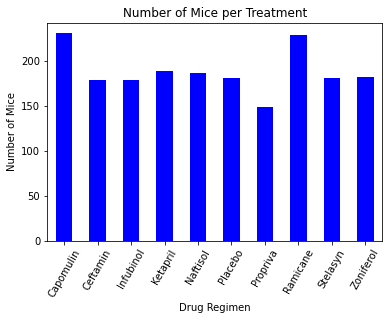

In [21]:
Pandas_Bar = mice_per_treatment.plot.bar(x_axis, number_of_mice, color="b", alpha=1.0, align="center", rot=60)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Pandas_Bar

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [23]:
drugs = new_combined_data_df["Drug Regimen"].sort_values().unique()

In [24]:
Drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

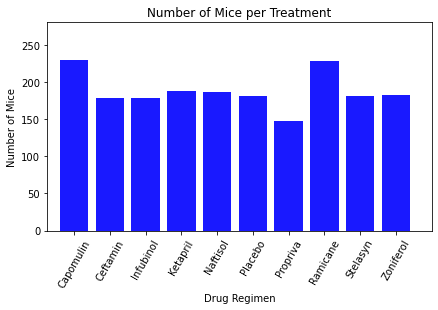

In [25]:

x_axis = np.arange(len(new_combined_data_df["Drug Regimen"].unique()))

plt.bar(x_axis, mice_per_treatment, color="b", alpha=0.9, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drugs, rotation=60)
plt.tight_layout()

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_per_treatment)+50)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [27]:
# Get number of male vs female 
gender_group = new_combined_data_df.groupby(["Mouse ID", "Sex"])

In [28]:
mouseID = new_combined_data_df["Mouse ID"].sort_values().unique()

In [29]:
# Check that "Sex" contains only Male and Female values
gender = new_combined_data_df["Sex"].unique() 
# gender

In [30]:
gender_df = pd.DataFrame(gender_group.size())

In [31]:
mouse_gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count()).reset_index()
mouse_gender_df.columns = ["Sex", "Count"]
# mouse_gender_df

In [32]:
male_count = mouse_gender_df.loc[mouse_gender_df["Sex"] == "Male", "Count"].sum()

In [33]:
female_count = mouse_gender_df.loc[mouse_gender_df["Sex"] == "Female", "Count"].sum()

In [34]:
total_count = mouse_gender_df["Count"].sum()

In [35]:
# Get percentage of male and female

In [36]:
# Male:
percent_male = (100 * male_count/total_count).round(1)

In [37]:
# Female:
percent_female = (100 * female_count/total_count).round(1)

In [38]:
percent = [percent_male, percent_female]
mouse_gender_df["Percent"] = percent
mouse_gender_df

,Sex,Count,Percent
0,Female,123,50.4
1,Male,125,49.6


In [39]:
pie_df = pd.DataFrame({'Sex': ['Female', 'Male'],
                   'Count': [female_count, male_count],
                   'Percent': [percent_female, percent_male]},
                  index=['Female', 'Male'])

C:\Users\kevin\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


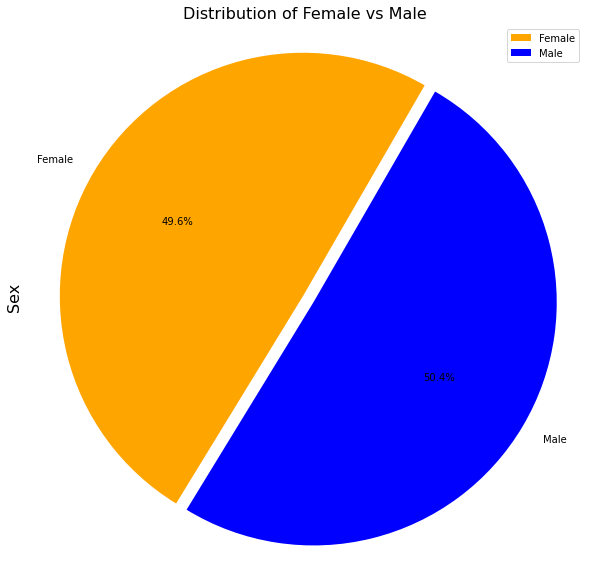

In [40]:
colors = ['orange', 'blue']
explode = (0.05, 0)

Pandas_Pie = pie_df.plot.pie(y='Count', figsize=(10,10), colors=colors, startangle=60, explode=explode, autopct="%0.1f%%")

plt.title('Distribution of Female vs Male',fontsize = 16)
plt.ylabel('Sex',fontsize = 16)
plt.axis("equal",fontsize = 16)

plt.show()

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



C:\Users\kevin\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if sys.path[0] == '':


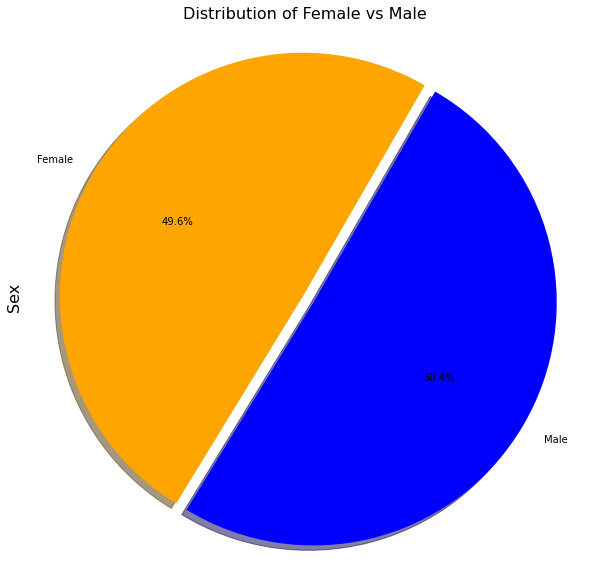

In [42]:
colors = ['orange', 'blue']
explode = (0.05, 0)
labels = ["Female","Male"]
percent = [49.6, 50.4]

fig1, ax1 = plt.subplots(figsize=(10, 10))

plt.pie(percent, explode=explode,labels=labels, colors=colors, autopct="%0.1f%%", shadow=True, startangle=60,)

plt.title('Distribution of Female vs Male',fontsize = 16)
plt.ylabel('Sex',fontsize = 16)
plt.axis("equal",fontsize = 16)

plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [57]:
# Tumor Volumes: Capomulin

capomulin_df = new_combined_data_df.loc[new_combined_data_df["Drug Regimen"] == "Capomulin", :]

cap_last_timepoint = capomulin_df.groupby("Mouse ID")["Timepoint"].max()

capTV_last_timepoint = pd.DataFrame(cap_last_timepoint)

cap_merge_df = pd.merge(capTV_last_timepoint, new_combined_data_df, on=("Mouse ID","Timepoint"))

capomulin_tumor_vols = cap_merge_df["Tumor Volume (mm3)"]
# capomulin_tumor_vols

In [45]:
# Tumor Volumes: Ramicane

ramicane_df = new_combined_data_df.loc[new_combined_data_df["Drug Regimen"] == "Ramicane", :]

ram_last_timepoint = ramicane_df.groupby("Mouse ID")["Timepoint"].max()

ramTV_last_timepoint = pd.DataFrame(ram_last_timepoint)

ram_merge_df = pd.merge(ramTV_last_timepoint, new_combined_data_df, on=("Mouse ID","Timepoint"))

ramicane_tumor_vols = ram_merge_df["Tumor Volume (mm3)"]
# ramicane_tumor_vols

In [46]:
# Tumor Volumes: Infubinol

infubinol_df = new_combined_data_df.loc[new_combined_data_df["Drug Regimen"] == "Infubinol", :]

infub_last_timepoint = infubinol_df.groupby("Mouse ID")["Timepoint"].max()

infubTV_last_timepoint = pd.DataFrame(infub_last_timepoint)

infub_merge_df = pd.merge(infubTV_last_timepoint, new_combined_data_df, on=("Mouse ID","Timepoint"))

infubinol_tumor_vols = infub_merge_df["Tumor Volume (mm3)"]
# infubinol_tumor_vols

In [47]:
# Tumor Volumes: Ceftamin

ceftamin_df = new_combined_data_df.loc[new_combined_data_df["Drug Regimen"] == "Ceftamin", :]

ceft_last_timepoint = ceftamin_df.groupby("Mouse ID")["Timepoint"].max()

ceftTV_last_timepoint = pd.DataFrame(ceft_last_timepoint)

ceft_merge_df = pd.merge(ceftTV_last_timepoint, new_combined_data_df, on=("Mouse ID","Timepoint"))

ceftamin_tumor_vols = ceft_merge_df["Tumor Volume (mm3)"]
# ceftamin_tumor_vols

In [48]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
           
    # Determine outliers using upper and lower bounds

In [49]:
# Calculate the quartiles and IQR: Capomulin

quartiles = capomulin_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [50]:
# Calculate the quartiles and IQR: Ramicane

quartiles = ramicane_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [51]:
# Calculate the quartiles and IQR: Infubinol

quartiles = infubinol_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinolis: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinolis: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [52]:
# Calculate the quartiles and IQR: Ceftamin

quartiles = ceftamin_tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


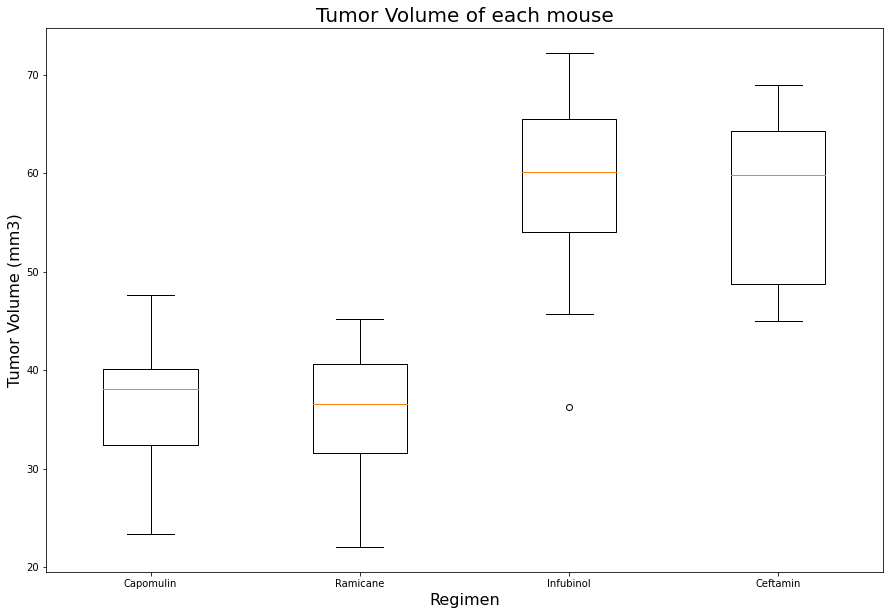

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_volume_data = [capomulin_tumor_vols, ramicane_tumor_vols, infubinol_tumor_vols, ceftamin_tumor_vols]
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume of each mouse', fontsize = 20)
ax1.set_xlabel("Regimen", fontsize = 16)
ax1.set_ylabel('Tumor Volume (mm3)', fontsize = 16)
ax1.boxplot(tumor_volume_data, labels=treatments)
plt.show()

## Line and Scatter Plots

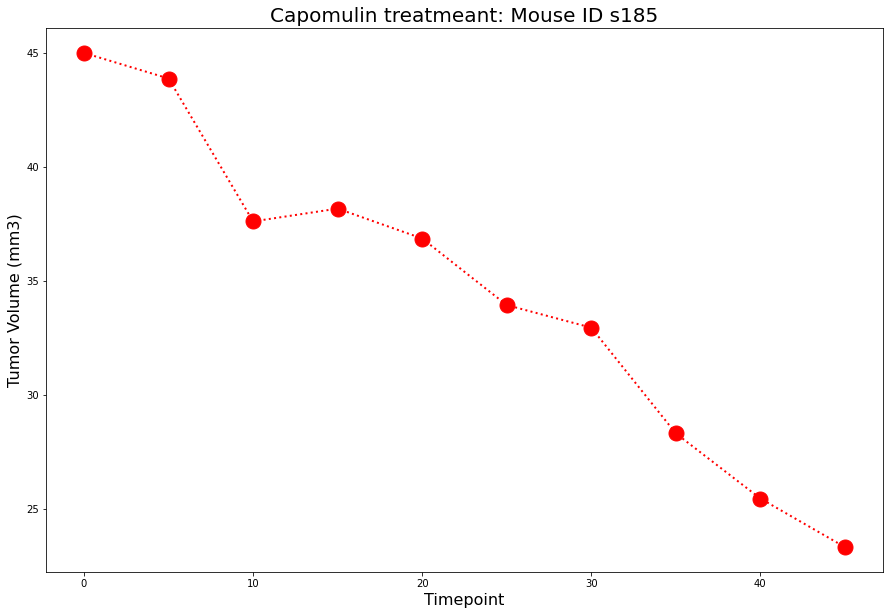

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", :]

x_axis = s185_df["Timepoint"]
y_axis = s185_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(x_axis, y_axis,linewidth=2, linestyle = 'dotted', markersize=15,marker="o",color="red")

plt.title('Capomulin treatmeant: Mouse ID s185',fontsize =20)
plt.xlabel('Timepoint',fontsize =16)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)


plt.show()


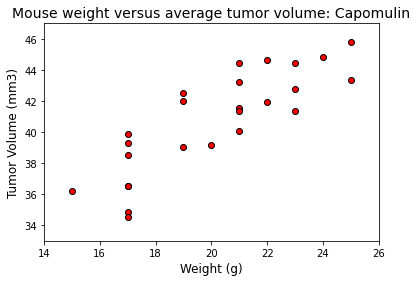

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = new_combined_data_df.loc[new_combined_data_df["Drug Regimen"] == "Capomulin", :]

cap_avgTV =capomulin_df.groupby(['Mouse ID']).mean()

x_axis = cap_avgTV["Weight (g)"]
y_axis = cap_avgTV["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

plt.xlim(14,26)
plt.ylim(33,47)

plt.title("Mouse weight versus average tumor volume: Capomulin", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [98]:
correlation = st.pearsonr(cap_avgTV["Weight (g)"],cap_avgTV["Tumor Volume (mm3)"])
print(f"The correlation coefficient is {round(correlation[0],2)}")

The correlation coefficient is 0.84


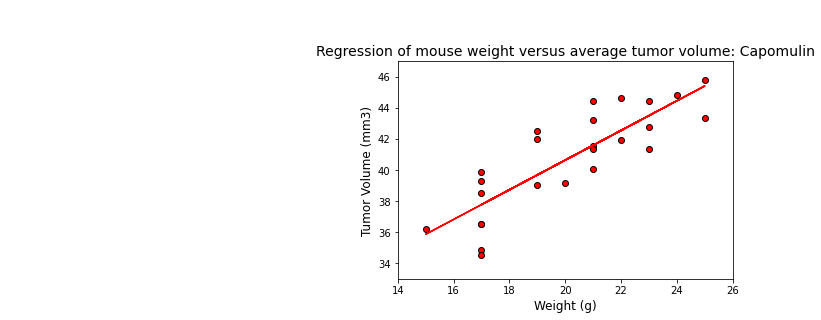

In [102]:
x_axis = cap_avgTV["Weight (g)"]
y_axis = cap_avgTV["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

plt.xlim(14,26)
plt.ylim(33,47)

plt.title("Regression of mouse weight versus average tumor volume: Capomulin", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=11,color="black")

plt.show()

In [99]:
print(f"The r-squared is: {rvalue**2}")


The r-squared is: 0.7088568047708717
